In [1]:
import torch
from Nets import Net, NetNoise
from functions import test
from dataloaders.mnist import MNIST_for_classes, MNIST
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

torch.cuda.is_available()
device = 'cuda'

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import torch.nn.functional as F
def train_validation_all_classes(model, optimizer, tasks, epoch=1, log_interval = 1000):
    train_losses = []
    tasks_losses = [[], [], [], [], []]
    exemplers = []
    model.train()
    for train_loader in tasks:
        for batch_idx, (data, target) in enumerate(train_loader):
            exemplers.append(train_loader.batch_size * batch_idx)
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print(f"Train [{batch_idx * len(data)} / {len(train_loader.dataset)}]       loss: {loss.item()}")
                for i in range(len(tasks)):
                    tasks_losses[i].append(test(model, tasks[i], print_accuracy=False))

            train_losses.append(loss.item())
    return train_losses, tasks_losses, exemplers

In [3]:
task1 = MNIST_for_classes(0, 1)
task2 = MNIST_for_classes(2, 3)
task3 = MNIST_for_classes(4, 5)
task4 = MNIST_for_classes(6, 7)
task5 = MNIST_for_classes(8, 9)

tasks = [task1 ,task2, task3, task4, task5]

_, _, test_loader = MNIST()

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


-------------------------------------------------- benchmark normal training --------------------------------------------------
Train [0 / 12665]       loss: 2.393383026123047


c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train [1280 / 12665]       loss: 1.3028359413146973
Train [2560 / 12665]       loss: 0.010241454467177391
Train [3840 / 12665]       loss: 0.006836002226918936
Train [5120 / 12665]       loss: 0.0073971995152533054
Train [6400 / 12665]       loss: 0.014230863191187382
Train [7680 / 12665]       loss: 0.0035311859101057053
Train [8960 / 12665]       loss: 0.003085945500060916
Train [10240 / 12665]       loss: 0.0105614447966218
Train [11520 / 12665]       loss: 0.0065789539366960526
Train [0 / 12089]       loss: 9.311959266662598
Train [1280 / 12089]       loss: 0.6986448764801025
Train [2560 / 12089]       loss: 1.0094984769821167
Train [3840 / 12089]       loss: 0.23890364170074463
Train [5120 / 12089]       loss: 0.1491243988275528
Train [6400 / 12089]       loss: 0.10271821916103363
Train [7680 / 12089]       loss: 0.07083095610141754
Train [8960 / 12089]       loss: 0.05435250699520111
Train [10240 / 12089]       loss: 0.11964049935340881
Train [11520 / 12089]       loss: 0.0743826

tensor(19.3500)

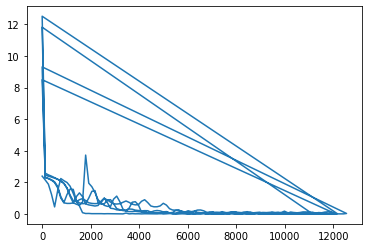

In [13]:
print('-'*50, 'benchmark normal training', '-'*50)
model = Net(10)
optimizer = optim.SGD(model.parameters(), lr=0.1)


train_losses, tasks_losses, exemplers = train_validation_all_classes(model, optimizer, tasks, epoch=1, log_interval = 10)

plt.plot(exemplers, train_losses)
test(model, test_loader)

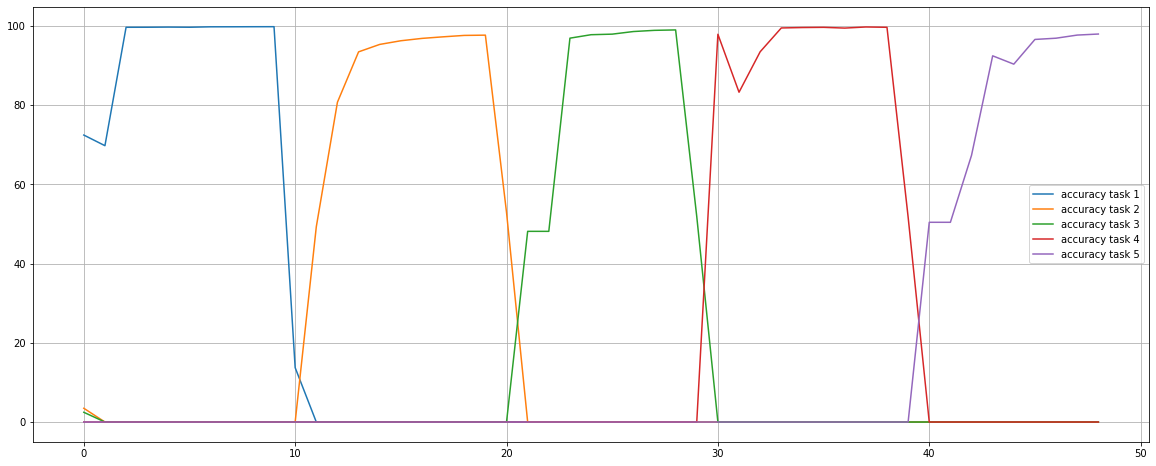

In [24]:
plt.figure(figsize=(20,8))
for i in range(len(tasks_losses)):
    plt.plot(tasks_losses[i])

plt.legend([f"accuracy task {i+1}" for i in range(len(tasks_losses))])
plt.grid()
plt.show()